In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as pt
from matplotlib import style
import random

In [2]:
def create_dataset(n, variance, corr=True):
    val = 1
    y_val = []
    x_val = []
    for i in range(n):
        y = val + random.randrange(-variance, variance)
        y_val.append(y)
        if corr:
            val += 5
        else:
            val -= 5
        x_val.append(i)
    return np.array(x_val, dtype=np.float64), np.array(y_val, dtype=np.float64)

In [3]:
x_val, y_val = create_dataset(50, 10)

In [4]:
def best_slope(xs, ys):
    slope = mean(xs) * mean(ys)
    slope = slope - mean(xs * ys)
    slope = slope / ((mean(xs) * mean(xs)) - mean(xs * xs))
    return slope

In [5]:
m = best_slope(x_val, y_val)

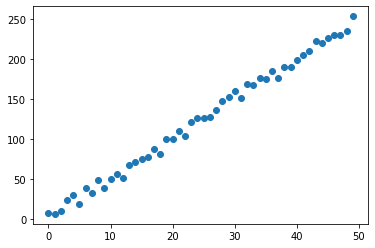

In [6]:
pt.scatter(x_val, y_val)

In [7]:
def y_intercept(xs, ys, m):
    b = mean(ys) - (m * mean(xs))
    return b

In [8]:
b = y_intercept(x_val, y_val, m)

In [9]:
reg_line = [(m * x) + b for x in x_val]

In [10]:
def err_square(ys_o, ys_l):
    return sum((ys_l - ys_o) ** 2)

In [11]:
def cof_det(ys_o, ys_l):
    ym = [mean(ys_o) for y in ys_o]
    ers = err_square(ys_o, ys_l)
    erm = err_square(ys_o, ym)
    return 1 - (ers / erm)

In [12]:
conf = cof_det(y_val, reg_line)

In [13]:
print(conf)

0.9945856700219978


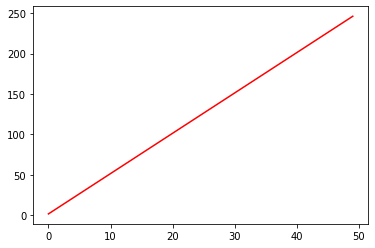

In [14]:
pt.plot(x_val, reg_line, color="r")
pt.show()